### Importing libraries

In [2]:
import pandas as pd

### Loading Datasets

In [7]:
# Load dataset
df = pd.read_csv('Dataset.csv',index_col=0)
df.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,,,,,,,,,,,,,,,,,,,,
6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Handle missing values

In [8]:

df.fillna(df.mean(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp/ipykernel_10376/3155619253.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


**1. Explore the latitude and longitude coordinates of
the restaurants and visualize their distribution on a
map.**

In [9]:
import folium

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], 
                  popup=row['Restaurant Name']).add_to(mymap)

# Save the map to an HTML file (optional)
mymap.save('restaurant_distribution_map.html')

**2. Group the restaurants by city or locality and
analyze the concentration of restaurants in
different areas.**

Restaurant Counts by City:
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64


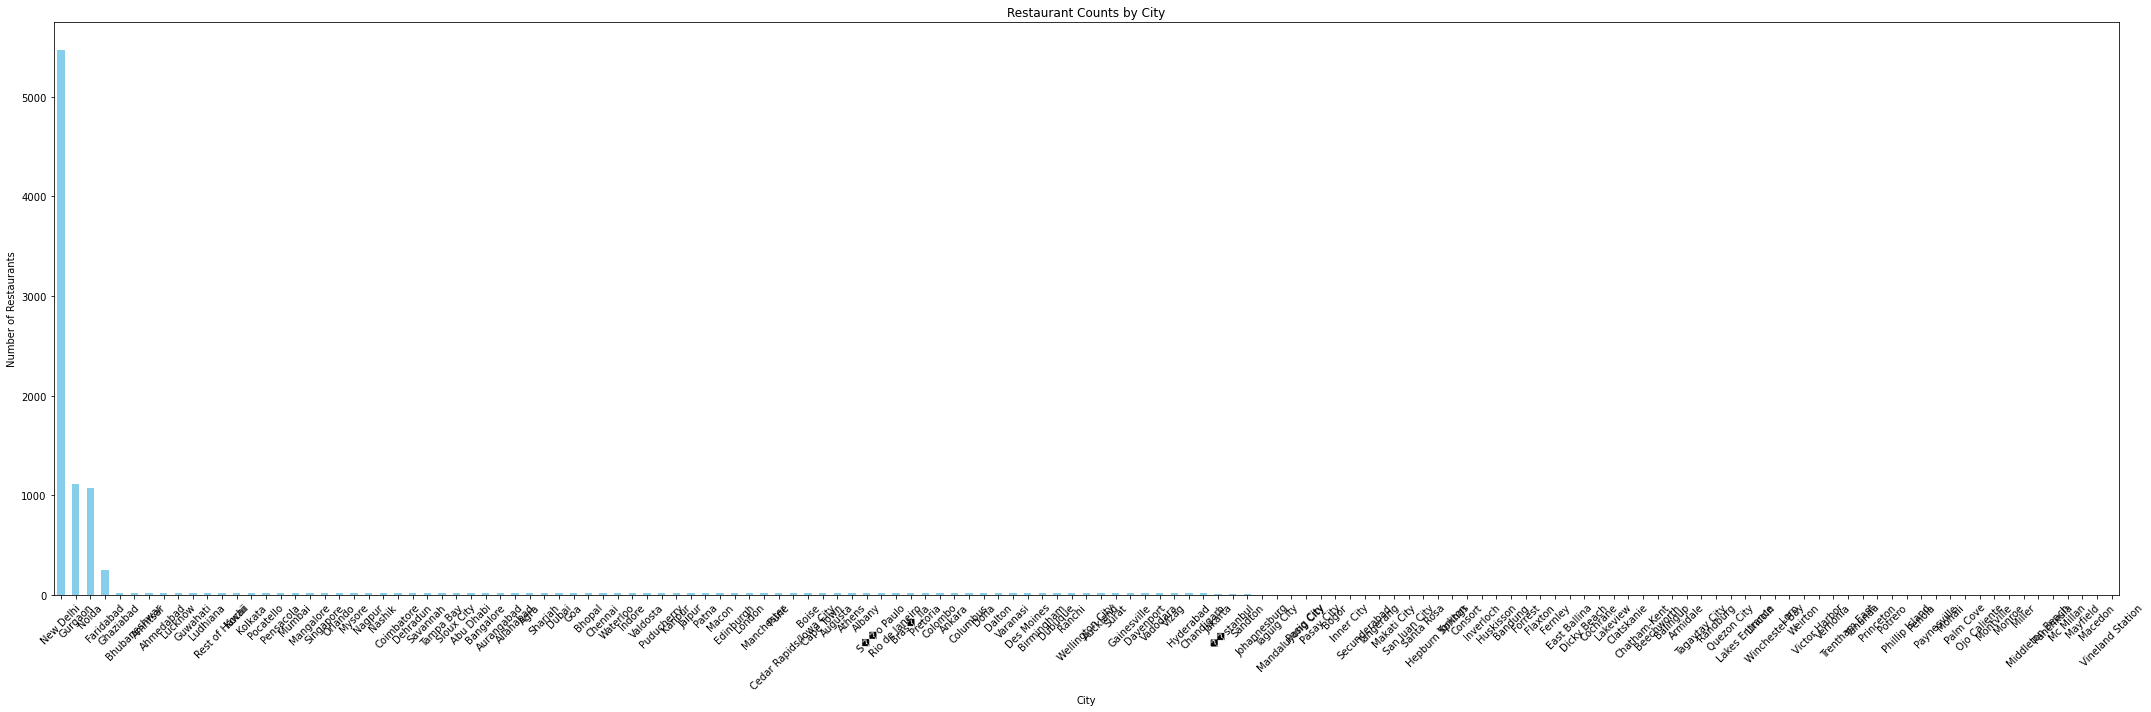

In [10]:
import matplotlib.pyplot as plt

city_counts = df['City'].value_counts()

print("Restaurant Counts by City:")
print(city_counts)

# Plotting the restaurant counts by city 
plt.figure(figsize=(30, 10)) 
city_counts.plot(kind='bar', color='skyblue')
plt.title('Restaurant Counts by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3. Calculating statistics - the average ratings,
cuisines and price ranges by city.**

In [11]:
required_columns = ['City', 'Aggregate rating', 'Cuisines', 'Price range']

avg_ratings = df.groupby('City')['Aggregate rating'].mean()

print("Average Ratings by City:")
print(avg_ratings)
print()

# Calculate most common cuisine by city
most_common_cuisine = df.groupby('City')['Cuisines'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

print("Most Common Cuisine by City:")
print(most_common_cuisine)
print()

# Calculate average price range by city
avg_price_range = df.groupby('City')['Price range'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

print("Average Price Range by City:")
print(avg_price_range)


Average Ratings by City:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

Most Common Cuisine by City:
City
Abu Dhabi                                                  American
Agra                                          North Indian, Mughlai
Ahmedabad          Cafe, American, Continental, Armenian, Fast Food
Albany                                                 North Indian
Allahabad                                     North Indian, Chinese
                                         ...                       
Weirton                                     Burger, Greek, Sandwich
Wellington City                                                Cafe
Winchester Bay                 

**4. Other interesting insights related
to the locations of the restaurants.**
- High Concentration Areas: Cities with the highest concentration of restaurants.
- Cuisine Popularity: Determining which cuisines are most popular in different cities.
- Price Range Distribution: Analyzing the distribution of price ranges in various localities.
- Rating Patterns: Observing patterns in average ratings across different cities.

**4.1. High concentration Areas**

            City  restaurant_count
88     New Delhi              5473
50       Gurgaon              1118
89         Noida              1080
43     Faridabad               251
48     Ghaziabad                25
17  Bhubaneshwar                21
69       Lucknow                21
5       Amritsar                21
2      Ahmedabad                21
51      Guwahati                21


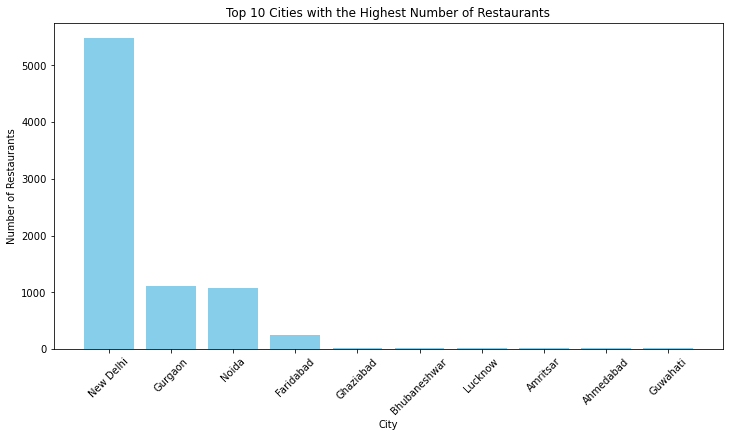

In [14]:
# Group by city and count the number of restaurants
restaurant_count_by_city = df.groupby('City')['Restaurant Name'].count().reset_index()
restaurant_count_by_city.columns = ['City', 'restaurant_count']

# Sort the cities by restaurant count in descending order
restaurant_count_by_city = restaurant_count_by_city.sort_values(by='restaurant_count', ascending=False)

# Display the top 10 cities with the highest number of restaurants
top_10_cities = restaurant_count_by_city.head(10)
print(top_10_cities)

# Plot the top 10 cities with the highest number of restaurants
plt.figure(figsize=(12, 6))
plt.bar(top_10_cities['City'], top_10_cities['restaurant_count'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Cities with the Highest Number of Restaurants')
plt.xticks(rotation=45)
plt.show()